# unit 4.3 - Data loaders

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/43-dataloaders.ipynb)

[Data loaders from PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) are a very useful tool to load data in batches and shuffle it. This is very useful when training neural networks.

Most of a data scientist time is used on data preparation. Data scientists can spend 90-95% of their time on data preparation, so it is important to have a good data loader that can handle the data in a way that is easy to use and efficient.

Here we create a custom dataset loader for a folder of images.

In [12]:
# imports:
import torch
import torchvision
import torchvision.transforms as transforms

[Transforms in PyTorch](https://pytorch.org/vision/0.9/transforms.html) are very useful to preprocess data. Here we use `transforms.Compose` to chain together a series of transforms. We use `transforms.Resize` to resize the image to a fixed size, `transforms.Normalize` to set the value of mean and std for each input channel, and `transforms.ToTensor` to convert the image to a tensor. There are many other transforms available in PyTorch, such as `transforms.CenterCrop` to crop the image to a fixed size, and more.

In [15]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # mean and std for 3 channels - should be 0 and 1, but here we use this to visualize the images in full color
    transforms.Normalize((0.0, 0.0, 0.0), (1.0, 1.0, 1.0))
])

batch_size = 3
trainset = torchvision.datasets.ImageFolder(root='./data/my_data/train', 
                                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
classes = ('cat1', 'cat2', 'cat3')

Here we plot a few examples of the images in the dataset. This is useful to check if the data loader is working correctly. We always need to visualize what is the input for the neural network.


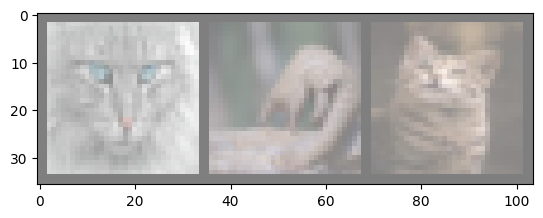

cat1  cat3  cat1 


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# print(images[0].shape, images[0].mean(), images[0].std())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Issues

Sometimes, especially when dealing with images, the input data size can be very large. In this case, we can use `transforms.CenterCrop` to crop the image to a fixed size, and `transforms.RandomCrop` to crop the image to a random size. This is useful to reduce the input size and speed up training.

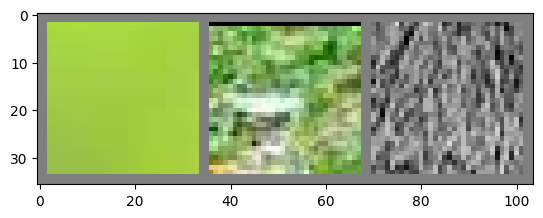

cat2  cat3  cat1 


In [ ]:
# same example as above but with randomcrop
transform = transforms.Compose([
    # transforms.Resize((32,32)),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 3
trainset = torchvision.datasets.ImageFolder(root='./data/my_data/train', 
                                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
classes = ('cat1', 'cat2', 'cat3')

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


As you can see this may or may not work, because we may be getting parts of the images that have no content of interest.

Here we try to load them all in original size, but it will fail because the data loader wants all images to be of the same size!

In [11]:
# load one image and display it full size

transform = transforms.Compose([
    # transforms.Resize((32,32)),
    # transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 3
trainset = torchvision.datasets.ImageFolder(root='./data/my_data/train', 
                                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
classes = ('cat1', 'cat2', 'cat3')

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.12/site-packages/torch/utils/data/_utils/worker.py", line 309, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.12/site-packages/torch/utils/data/_utils/fetch.py", line 55, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 317, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 174, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.12/site-packages/torch/utils/data/_utils/collate.py", line 214, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: stack expects each tensor to be equal size, but got [3, 154, 220] at entry 0 and [3, 132, 126] at entry 1


For example, imagine that we want to identify animal species based on their eye, then we will need to either use large resolution input images or to crop the images to the eye region. Here we will do it manually.

In [ ]:
# load properly cropped data:

transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 3
trainset = torchvision.datasets.ImageFolder(root='./data/my_data_crops/train', 
                                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
classes = ('cat1', 'cat2', 'cat3')

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Notes

There is a lot that can go wrong just here, when preparing the data for neural network training. This is why it is important to visualize the data and check if it is being loaded correctly.

Always check your steps and make sure that the data is being loaded correctly. This will save you a lot of time from debugging. 